In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA
import pymc

Couldn't import dot_parser, loading of dot files will not be possible.


In [83]:
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T
    return summ

In [84]:
alpha_d=sp.stats.t.rvs(df=4,loc=0,scale=2,size=10)
beta_d=sp.stats.t.rvs(df=4,loc=0,scale=1,size=10)
x=np.random.uniform(size=10)
theta_d=pymc.invlogit(alpha_d+beta_d*x)

n=[]
num=0
while num<10:
    n_cand=np.random.poisson(5)
    if n_cand>0:
        n.append(n_cand)
        num+=1
n=np.array(n)

y=np.random.binomial(n,theta_d)

In [85]:
def p(alpha,beta,n,y,x):
    val=1.0
    for j in range(len(n)):
        val=val*np.power(np.exp(alpha+x[j]*beta)/(np.exp(alpha+x[j]*beta)+1),y[j])*np.power(1/(np.exp(alpha+x[j]*beta)+1),n[j]-y[j])
    val=val*sp.stats.t.pdf(alpha,df=4,loc=0,scale=2)
    val=val*sp.stats.t.pdf(beta,df=4,loc=0,scale=1)
    return val

In [86]:
ratio=[]
for i in range(20000):
    alpha_beta_cand=sp.stats.multivariate_normal.rvs([0,0],[[4,0],[0,1]])
    ratio.append(p(alpha_beta_cand[0],alpha_beta_cand[1],n,y,x)/sp.stats.multivariate_normal.pdf(alpha_beta_cand,[0,0],[[4,0],[0,1]]))

In [87]:
M=np.max(ratio)*1.1

In [88]:
num=0
alpha=[]
beta=[]
r=[]
while num<1000:
    alpha_beta_cand=sp.stats.multivariate_normal.rvs([0,0],[[4,0],[0,1]])
    ratios=(p(alpha_beta_cand[0],alpha_beta_cand[1],n,y,x)/sp.stats.multivariate_normal.pdf(alpha_beta_cand,[0,0],[[4,0],[0,1]]))/M
    r.append(ratios)
    if ratios>np.random.uniform():
        alpha.append(alpha_beta_cand[0])
        beta.append(alpha_beta_cand[1])
        num+=1

In [89]:
np.max(r)

1.1009739441767934

(array([   3.,    8.,   37.,  105.,  178.,  255.,  219.,  138.,   53.,    4.]),
 array([-2.25591472, -1.97588366, -1.69585259, -1.41582153, -1.13579047,
        -0.85575941, -0.57572835, -0.29569729, -0.01566622,  0.26436484,
         0.5443959 ]),
 <a list of 10 Patch objects>)

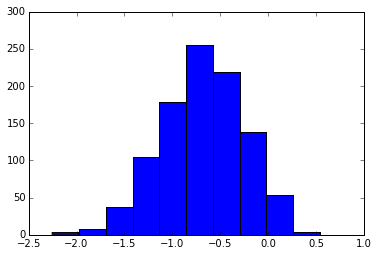

In [90]:
plt.hist(alpha)

(array([  17.,   73.,  138.,  205.,  222.,  148.,  102.,   55.,   29.,   11.]),
 array([-1.06719861, -0.62228932, -0.17738004,  0.26752925,  0.71243854,
         1.15734783,  1.60225712,  2.04716641,  2.49207569,  2.93698498,
         3.38189427]),
 <a list of 10 Patch objects>)

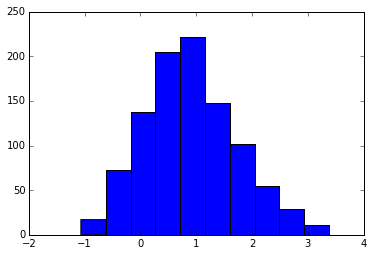

In [91]:
plt.hist(beta)

In [92]:
print summ(alpha)
print summ(beta)

          mean      sd      2.5%       25%       50%       75%    97.5%
info -0.676226  0.4363 -1.567474 -0.951952 -0.663404 -0.369219  0.14048
         mean        sd      2.5%       25%       50%       75%     97.5%
info  0.89782  0.826038 -0.543038  0.325278  0.833787  1.399957  2.678405


In [93]:
def IR(alpha,beta,n,x,y):
    ir=[]
    for i in range(len(alpha)):
        ir.append(p(alpha[i],beta[i],n,y,x)/(sp.stats.t.pdf(alpha[i],df=4,loc=0,scale=2)*sp.stats.t.pdf(beta[i],df=4,loc=0,scale=1)))
    return np.array(ir)

def E(theta,w):
    return np.mean(theta*w)/np.mean(w)

In [94]:
alpha=sp.stats.t.rvs(df=4,loc=0,scale=2,size=1000)
beta=sp.stats.t.rvs(df=4,loc=0,scale=1,size=1000)

w=IR(alpha,beta,n,x,y)

E_of_alpha=E(alpha,w)
E_of_beta=E(beta,w)

In [95]:
print E_of_alpha
print E_of_beta

-0.718559860967
1.00125755914


In [97]:
S_eff=1./np.sum(np.square(w*len(w)/np.sum(w)))

In [98]:
print S_eff

9.58082861896e-05
